---
title: "Modul 7 Struktur Data: *Binary Tree*, *Binary Search Tree* (BST)"
subtitle: "Binary Tree & Binary Search Tree"
description: "Offline di Departemen Matematika"
date: 11/19/2024
page-navigation: true
format: html
---

Kembali ke [Struktur Data](strukdat2024.qmd)

*Binary tree* adalah salah satu jenis struktur data pohon di mana setiap simpul (*node*) memiliki maksimal dua anak (*child*), yaitu *left child* dan *right child*. Struktur ini digunakan untuk merepresentasikan hierarki data atau hubungan tertentu antara data dalam bentuk yang terorganisasi.

In [1]:
import numpy as np
import graphviz as gv

## Implementasi *binary tree*

### *Binary Tree* dengan *array*

In [2]:
class ArrayBintree:
    def __init__(self, dtype, height, emptydata=-9999):
        self.dtype = dtype
        self.height = height
        self.emptydata = emptydata
        self.array_size = 2**(height+1) - 1
        self.array = np.empty(self.array_size, dtype=dtype)
        for i in range(self.array_size):
            self.array[i] = emptydata

    def get_root(self):
        root_data = self.array[0]
        if root_data == self.emptydata:
            return None
        else:
            return root_data

    def set_root(self, newdata):
        self.array[0] = newdata

    def get_data(self, node_idx):
        if node_idx < self.array_size:
            return self.array[node_idx]
        else:
            print("Error get_data: indeks di luar ukuran tree")
            return None

    def set_data(self, node_idx, newdata):
        if node_idx < self.array_size:
            self.array[node_idx] = newdata
        else:
            print("Error set_data: indeks di luar ukuran tree")

    def get_left_child_idx(self, node_idx):
        left_idx = 2*node_idx + 1
        if left_idx < self.array_size:
            return left_idx
        else:
            return -1

    def get_left_child(self, node_idx):
        left_idx = self.get_left_child_idx(node_idx)
        if left_idx != -1:
            data = self.array[left_idx]
            if data != self.emptydata:
                return data
            else:
                return None
        else:
            return None

    def get_right_child_idx(self, node_idx):
        right_idx = 2*node_idx + 2
        if right_idx < self.array_size:
            return right_idx
        else:
            return -1

    def get_right_child(self, node_idx):
        right_idx = self.get_right_child_idx(node_idx)
        if right_idx != -1:
            data = self.array[right_idx]
            if data != self.emptydata:
                return data
            else:
                return None
        else:
            return None

    def get_parent_idx(self, node_idx):
        if node_idx == 0:
            return -1
        idx = int(np.floor( (node_idx - 1)/2 ))
        return idx

    # preorder: tengah, kiri, kanan
    def get_preorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        # tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        # kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_preorder(current=left_idx, result=result)

        # kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_preorder(current=right_idx, result=result)

        if is_starting_node:
            return result

    # inorder: kiri, tengah, kanan
    def get_inorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        # kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_inorder(current=left_idx, result=result)

        # tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        # kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_inorder(current=right_idx, result=result)

        if is_starting_node:
            return result

    # postorder: kiri, kanan, tengah
    def get_postorder(self, current=0, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []

        # kiri
        left_idx = self.get_left_child_idx(current)
        if left_idx != -1:
            self.get_postorder(current=left_idx, result=result)

        # kanan
        right_idx = self.get_right_child_idx(current)
        if right_idx != -1:
            self.get_postorder(current=right_idx, result=result)

        # tengah
        current_data = self.array[current]
        if current_data != self.emptydata:
            result.append(current_data)

        if is_starting_node:
            return result

    def get_digraph_simple(self):
        digraph = gv.Digraph()
        for idx in range(self.array_size):
            data = self.array[idx]
            if data != self.emptydata:
                digraph.node("node" + str(idx), label=str(data))
                left_idx = self.get_left_child_idx(idx)
                right_idx = self.get_right_child_idx(idx)
                if left_idx != -1:
                    digraph.edge("node" + str(idx), "node" + str(left_idx))
                    if self.array[left_idx] == self.emptydata:
                        digraph.node("node" + str(left_idx), label="NULL", shape="none")
                if right_idx != -1:
                    digraph.edge("node" + str(idx), "node" + str(right_idx))
                    if self.array[right_idx] == self.emptydata:
                        digraph.node("node" + str(right_idx), label="NULL", shape="none")
        return digraph

In [3]:
arraybintree = ArrayBintree(int, 2)

In [4]:
print(arraybintree.array)

[-9999 -9999 -9999 -9999 -9999 -9999 -9999]


In [5]:
arraybintree.set_root(10)

In [6]:
print(arraybintree.array)

[   10 -9999 -9999 -9999 -9999 -9999 -9999]


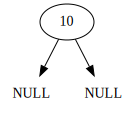

In [7]:
display(arraybintree.get_digraph_simple())

In [8]:
arraybintree.set_data(
    arraybintree.get_left_child_idx(0),
    5
)

In [9]:
print(arraybintree.array)

[   10     5 -9999 -9999 -9999 -9999 -9999]


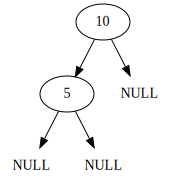

In [10]:
display(arraybintree.get_digraph_simple())

In [11]:
arraybintree.set_data(
    arraybintree.get_right_child_idx(0),
    19
)

In [12]:
print(arraybintree.array)

[   10     5    19 -9999 -9999 -9999 -9999]


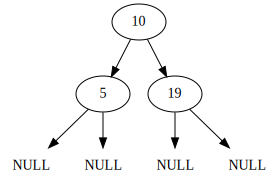

In [13]:
display(arraybintree.get_digraph_simple())

In [14]:
arraybintree.set_data(
    arraybintree.get_right_child_idx(arraybintree.get_left_child_idx(0)),
    37
)

In [15]:
print(arraybintree.array)

[   10     5    19 -9999    37 -9999 -9999]


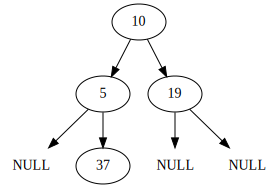

In [16]:
display(arraybintree.get_digraph_simple())

In [17]:
arraybintree.get_data(
    arraybintree.get_right_child_idx(arraybintree.get_left_child_idx(0))
)

37

In [18]:
arraybintree.array[5] = 98
arraybintree.array[6] = 62

In [19]:
print(arraybintree.array)

[   10     5    19 -9999    37    98    62]


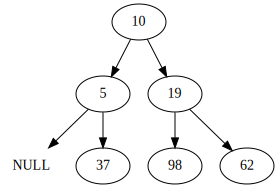

In [20]:
display(arraybintree.get_digraph_simple())

In [21]:
arraybintree.array[3] = 25

In [22]:
print(arraybintree.array)

[10  5 19 25 37 98 62]


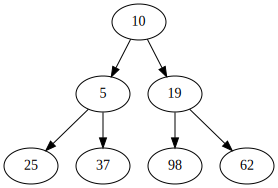

In [23]:
display(arraybintree.get_digraph_simple())

In [24]:
arraybintree.get_preorder()

[10, 5, 25, 37, 19, 98, 62]

In [25]:
arraybintree.get_inorder()

[25, 5, 37, 10, 98, 19, 62]

In [26]:
arraybintree.get_postorder()

[25, 37, 5, 98, 62, 19, 10]

### *Binary Tree* dengan *pointer* (*linked binary tree*)

In [27]:
class BintreeNode:
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right

In [28]:
class LinkedBintree:
    def __init__(self):
        self.root = None

    def is_empty(self):
        if self.root == None:
            return True
        else:
            return False

    def get_root_data(self):
        if self.is_empty():
            print("Error get_root_data: tree sedang kosong")
            return None
        else:
            return self.root.data

    def set_root_data(self, newdata):
        if self.is_empty():
            self.root = BintreeNode(newdata)
        else:
            self.root.data = newdata

    # preorder: tengah, kiri, kanan
    def get_preorder(self, current=None, result=None, get_addresses=False):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []
            current = self.root

        if current != None:
            # tengah
            if (not get_addresses):
                result.append(current.data)
            else:
                result.append(current)

            # kiri
            if current.left != None:
                self.get_preorder(current.left, result=result)

            # kanan
            if current.right != None:
                self.get_preorder(current.right, result=result)

        if is_starting_node:
            return result

    # inorder: kiri, tengah, kanan
    def get_inorder(self, current=None, result=None, get_addresses=False):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []
            current = self.root

        if current != None:
            # kiri
            if current.left != None:
                self.get_inorder(current.left, result=result)

            # tengah
            if (not get_addresses):
                result.append(current.data)
            else:
                result.append(current)

            # kanan
            if current.right != None:
                self.get_inorder(current.right, result=result)

        if is_starting_node:
            return result

    # postorder: kiri, kanan, tengah
    def get_postorder(self, current=None, result=None, get_addresses=False):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = []
            current = self.root

        if current != None:
            # kiri
            if current.left != None:
                self.get_postorder(current.left, result=result)

            # kanan
            if current.right != None:
                self.get_postorder(current.right, result=result)

            # tengah
            if (not get_addresses):
                result.append(current.data)
            else:
                result.append(current)

        if is_starting_node:
            return result

    # berdasarkan algoritma preorder traversal :D
    def get_digraph_simple(self, current=None, node_name=None, result=None):
        is_starting_node = False
        if result == None:
            is_starting_node = True
            result = gv.Digraph()
            current = self.root
            node_name = "root"

        if current != None:
            # tengah
            result.node(node_name, label=str(current.data))

            # kiri
            left_name = node_name + "->left"
            result.edge(node_name, left_name)
            self.get_digraph_simple(
                current=current.left, node_name=left_name, result=result
            )

            # kanan
            right_name = node_name + "->right"
            self.get_digraph_simple(
                current=current.right, node_name=right_name, result=result
            )
            result.edge(node_name, right_name)
        else:
            result.node(node_name, label="NULL", shape="none")

        if is_starting_node:
            return result

In [29]:
linkedbintree = LinkedBintree()

In [30]:
print(linkedbintree.root)

None


In [31]:
linkedbintree.root = BintreeNode(26)

In [32]:
print(linkedbintree.root)

In [33]:
print(linkedbintree.root.data)

26


In [34]:
linkedbintree.root.left = BintreeNode(89)
linkedbintree.root.right = BintreeNode(54)

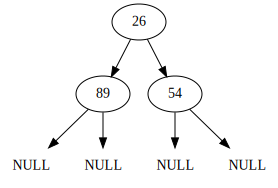

In [35]:
display(linkedbintree.get_digraph_simple())

In [36]:
linkedbintree.root.left.right = BintreeNode(43)

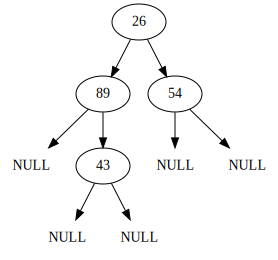

In [37]:
display(linkedbintree.get_digraph_simple())

In [38]:
print(linkedbintree.root.left.right.data)

43


In [39]:
linkedbintree.root.right.right = BintreeNode(11)
linkedbintree.root.right.right.left = BintreeNode(72)
linkedbintree.root.right.right.right = BintreeNode(35)

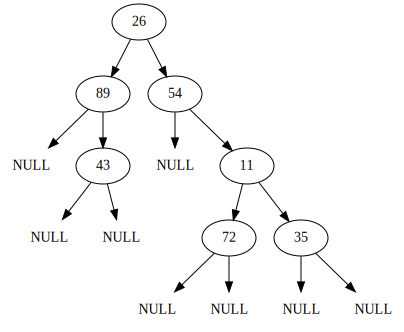

In [40]:
display(linkedbintree.get_digraph_simple())

In [41]:
linkedbintree.root.left.right.left = BintreeNode(90)
linkedbintree.root.left.right.left.right = BintreeNode(16)

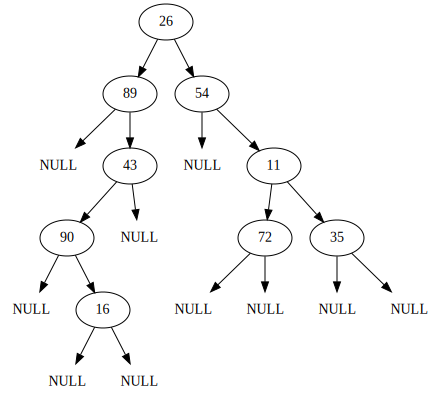

In [42]:
display(linkedbintree.get_digraph_simple())

In [43]:
linkedbintree.get_preorder()

[26, 89, 43, 90, 16, 54, 11, 72, 35]

In [44]:
linkedbintree.get_inorder()

[89, 90, 16, 43, 26, 54, 72, 11, 35]

In [45]:
linkedbintree.get_postorder()

[16, 90, 43, 89, 72, 35, 11, 54, 26]

## *Binary Search Tree* (BST) dengan *pointer* (*linked* BST)

*Binary Search Tree* (BST) adalah *binary tree* dengan beberapa sifat dan fitur tambahan. Sehingga, untuk implementasi BST, kita cukup menambahkan beberapa *method* ke `class` *binary tree* yang sudah dibuat. Daripada mengetik ulang semua *method* yang sudah dibuat di `class` *binary tree*, kita bisa menerapkan salah satu prinsip OOP yaitu *inheritance*, agar langsung mewariskan semua fitur yang sudah dibuat di implementasi *binary tree*.

Karakteristik dari BST adalah sebagai berikut
- Semua nilai di left subtree dari sebuah node lebih kecil dari nilai node tersebut.
- Semua nilai di right subtree dari sebuah node lebih besar dari nilai node tersebut.
- Tidak ada duplikasi nilai

Adanya aturan ini membuat pencarian, penyisipan, dan penghapusan data menjadi lebih efisien dibandingkan struktur data lainnya seperti array atau linked list.

Karena lebih fleksibel (tidak ada keterbatasan ukuran), kita akan membuat BST dengan *pointer* (juga disebut *linked* BST) saja, berarti meng-*inherit* dari `class LinkedBintree`.

(Membuat BST dengan *array* juga memungkinkan, meng-*inherit* dari `class ArrayBintree`, tetapi akan ada beberapa pertimbangan tambahan, misalnya untuk memastikan posisi *node* yang di-*insert* tidak melebihi kapastias *array*.)

In [46]:
class LinkedBST(LinkedBintree):
    def __init__(self):
        # menggunakan __init__ dari parent class,
        # melalui super() yaitu parent class
        super().__init__()

    # semua method dari LinkedBintree otomatis sudah terdefinisi

    # cari elemen di BST
    def search(self, x):
        temp = self.root
        while (temp != None):
            if x == temp.data:
                return x
            elif x < temp.data:
                temp = temp.left
            else:
                temp = temp.right
        return None

    # insertion
    def insert(self, newdata):
        if self.root == None:
            self.root = BintreeNode(newdata)
            return
        temp = self.root
        while (temp != None):
            if newdata == temp.data:
                print("Error insert: data sudah ada di BST, yaitu", newdata)
                return
            elif newdata < temp.data:
                if temp.left == None:
                    temp.left = BintreeNode(newdata)
                    return
                else:
                    temp = temp.left
            else: # newdata > temp.data
                if temp.right == None:
                    temp.right = BintreeNode(newdata)
                    return
                else:
                    temp = temp.right

    # deletion
    def delete(self, x, inorder_pred=False):
        if self.is_empty():
            print("Error: BST kosong")
            return
        prev = self.root
        turn = ""
        if x < prev.data:
            if prev.left == None:
                print("Error delete: tidak ditemukan data yang bernilai", x)
                return
            else:
                temp = prev.left
                turn = "left"
        elif x > prev.data:
            if prev.right == None:
                print("Error delete: tidak ditemukan data yang bernilai", x)
                return
            else:
                temp = prev.right
                turn = "right"
        else:
            temp = prev

        while (temp != None):
            if temp.data == x:
                break
            elif x < temp.data:
                if temp.left == None:
                    print("Error delete: tidak ditemukan data yang bernilai", x)
                    return
                else:
                    prev = temp
                    temp = temp.left
                    turn = "left"
            else: # x > temp.data
                if temp.right == None:
                    print("Error delete: tidak ditemukan data yang bernilai", x)
                    return
                else:
                    prev = temp
                    temp = temp.right
                    turn = "right"

        # kasus 0 children
        if (temp.left == None) and (temp.right == None):
            if turn == "left":
                prev.left = None
            elif turn == "right":
                prev.right = None
            del temp
            return

        # kasus 1 child, di kiri
        elif (temp.left != None) and (temp.right == None):
            if turn == "left":
                prev.left = temp.left
            elif turn == "right":
                prev.right = temp.left
            del temp
            return

        # kasus 1 child, di kanan
        elif (temp.left == None) and (temp.right != None):
            if turn == "left":
                prev.left = temp.right
            elif turn == "right":
                prev.right = temp.right
            del temp
            return

        # kasus 2 children
        elif inorder_pred: # metode inorder predecessor (left subtree)
            inorder_left = []
            self.get_inorder(current=temp.left, result=inorder_left)
            replacement = inorder_left[-1] # elemen terakhir
            self.delete(replacement, inorder_pred=inorder_pred)
            temp.data = replacement
            return
        else: # metode inorder successor (right subtree)
            inorder_right = []
            self.get_inorder(current=temp.right, result=inorder_right)
            replacement = inorder_right[0]
            self.delete(replacement, inorder_pred=inorder_pred)
            temp.data = replacement
            return

In [47]:
linkedbst = LinkedBST()

In [48]:
linkedbst.insert(10)

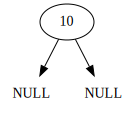

In [49]:
display(linkedbst.get_digraph_simple())

In [50]:
linkedbst.insert(27)

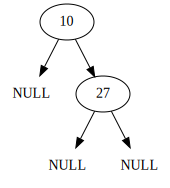

In [51]:
display(linkedbst.get_digraph_simple())

In [52]:
linkedbst.insert(5)

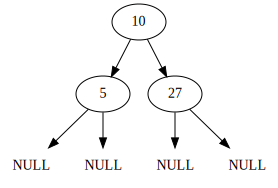

In [53]:
display(linkedbst.get_digraph_simple())

In [54]:
linkedbst.insert(8)

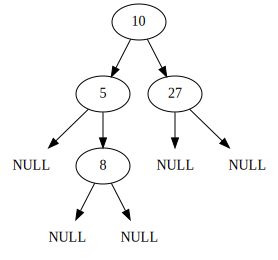

In [55]:
display(linkedbst.get_digraph_simple())

In [56]:
linkedbst.insert(8)

Error insert: data sudah ada di BST, yaitu 8


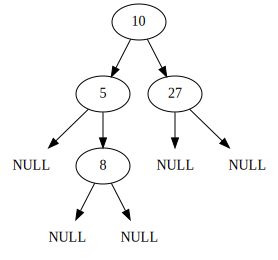

In [57]:
display(linkedbst.get_digraph_simple())

In [58]:
linkedbst.insert(16)

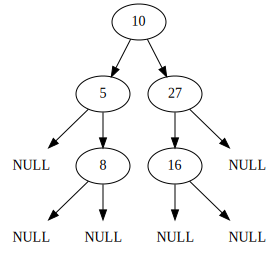

In [59]:
display(linkedbst.get_digraph_simple())

In [60]:
linkedbst.insert(38)

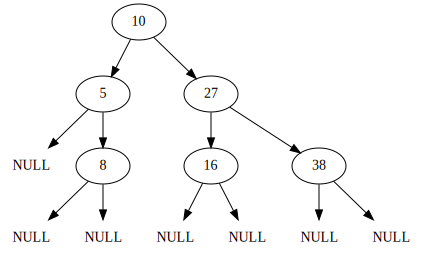

In [61]:
display(linkedbst.get_digraph_simple())

In [62]:
linkedbst.insert(3)

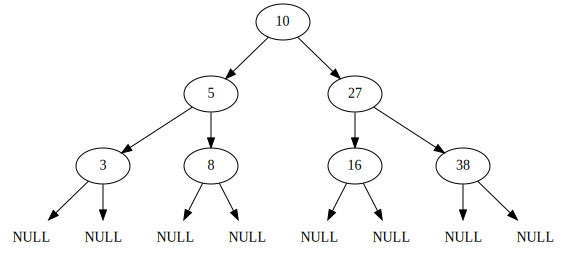

In [63]:
display(linkedbst.get_digraph_simple())

In [64]:
linkedbst.insert(9)

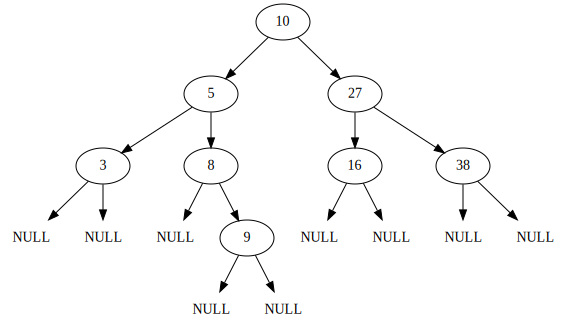

In [65]:
display(linkedbst.get_digraph_simple())

In [66]:
linkedbst.get_preorder()

[10, 5, 3, 8, 9, 27, 16, 38]

In [67]:
linkedbst.get_inorder()

[3, 5, 8, 9, 10, 16, 27, 38]

In [68]:
linkedbst.get_postorder()

[3, 9, 8, 5, 16, 38, 27, 10]

In [69]:
linkedbst.delete(50)

Error delete: tidak ditemukan data yang bernilai 50


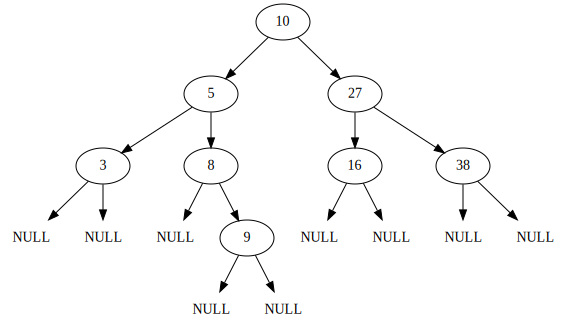

In [70]:
display(linkedbst.get_digraph_simple())

In [71]:
linkedbst.delete(3)

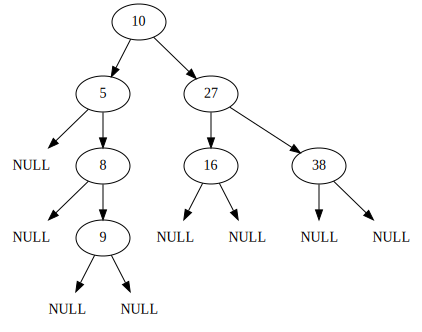

In [72]:
display(linkedbst.get_digraph_simple())

In [73]:
linkedbst.delete(8)

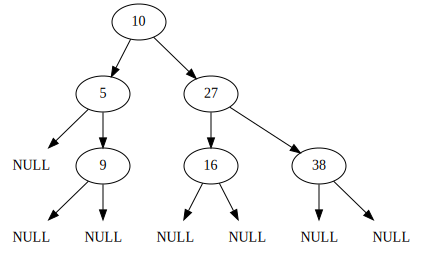

In [74]:
display(linkedbst.get_digraph_simple())

In [75]:
linkedbst.delete(27)

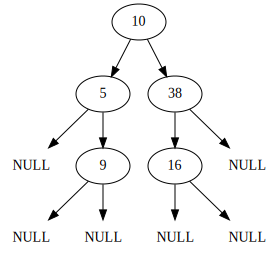

In [76]:
display(linkedbst.get_digraph_simple())

In [77]:
linkedbst.delete(10)

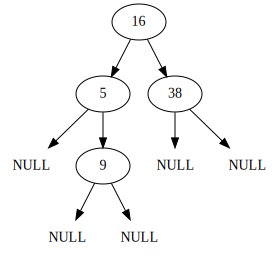

In [78]:
display(linkedbst.get_digraph_simple())

In [79]:
linkedbst.delete(16, inorder_pred=True)

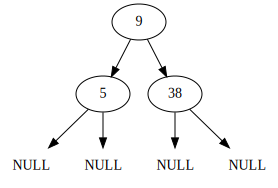

In [80]:
display(linkedbst.get_digraph_simple())

## Membuat Widgets untuk BST

In [90]:
from ipywidgets import IntText, Button, Label, Image
from IPython.display import display

In [97]:
# Mendefinisikan BST yang digunakan
binary_tree = LinkedBST()

# Membuat text box untuk insert nilai baru
insert_input = IntText(value=0, description='Insert: ')
delete_input = IntText(value=0, description='Delete: ')

# Membuat tombol untuk insert dan delete
insert_button = Button(description="Insert")
delete_button = Button(description="Delete")

# Menampilkan semua elemen pada Tree
digraph = binary_tree.get_digraph_simple()
digraph.format = 'png'
rendered = digraph.render(filename='temp_tree', cleanup=True)
with open(rendered, 'rb') as file:
    image_bytes = file.read()

tree_display = Image(value=image_bytes,
                     format='png',
                     width=300,
                     height=400,)

# Update gambar setiap ada insert/delete
def update_tree_display():
    digraph = binary_tree.get_digraph_simple()
    digraph.format = 'png'
    rendered = digraph.render(filename='temp_tree', cleanup=True)
    # Baca gambar sebagai bytes
    with open(rendered, 'rb') as file:
        tree_display.value = file.read()

# Membuat fungsi untuk melakukan Insert
def insert_handler(b):
    value = insert_input.value
    result = binary_tree.insert(value)
    update_tree_display()

# Membuat fungsi untuk melakukan Delete
def delete_handler(b):
    value = delete_input.value
    result = binary_tree.delete(value)
    update_tree_display()

# Ketika tombol diklik, maka fungsi sebelumnya akan dijalankan
insert_button.on_click(insert_handler)
delete_button.on_click(delete_handler)

# Menampilkan UI
display(insert_input, delete_input, insert_button, delete_button, tree_display)

IntText(value=0, description='Insert: ')

IntText(value=0, description='Delete: ')

Button(description='Insert', style=ButtonStyle())

Button(description='Delete', style=ButtonStyle())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00S\x00\x00\x00;\x08\x06\x00\x00\x00\x07\x15\xb67\x…

Error delete: tidak ditemukan data yang bernilai 6


## (TODO) (Pengayaan) `LinkedBintree` dari *preorder*, *inorder*, dan/atau *postorder*

Kita akan membuat `LinkedBintree` saja, karena *height* dari *tree* yang akan dibentuk tidak bisa ditentukan sebelum *tree* selesai terbentuk, sedangkan pembuatan `ArrayBintree` melibatkan penentuan *height* di awal-awal sebelum *tree* dibentuk.

Jika diberikan *preorder* dengan *inorder*, atau *postorder* dengan *inorder*, maka hanya ada satu *binary tree* yang mungkin.

Namun, apabila diberikan *preorder* dengan *postorder*, maka *binary tree* yang dibentuk belum tentu unik. Meskipun demikian, apabila ditambahkan syarat bahwa *binary tree* yang dibentuk harus bersifat *complete*, maka *binary tree* yang dibentuk menjadi unik.

Oleh karena itu, untuk kasus diberikan *preorder* dengan *postorder*, ada algoritma biasa (tanpa syarat tersebut) dan algoritma dengan syarat tersebut.

### `LinkedBintree` dari *preorder* dan *inorder*

In [81]:
def linkedbintree_from_preorder_inorder(
        preorder, inorder, is_starting_node=True
    ):

    # Nanti di paling bawah tree kalau inorder sudah kosong,
    # tidak perlu buat node lagi; langsung return None (NULL)
    if len(inorder) == 0:
        return None

    # 1. Di antara semua elemen inorder, mana yang paling kiri di preorder?
    # Simpan index inorder nya
    selesai = False
    preorder_idx = 0
    while (preorder_idx < len(preorder)) and (not selesai):
        # lihat tiap elemen preorder dari kiri ke kanan,
        elemen_preorder = preorder[preorder_idx]
        # dan untuk tiap elemen preorder, periksa satu-satu apakah sama dengan
        # salah satu elemen inorder
        inorder_idx = 0
        while (inorder_idx < len(inorder)) and (not selesai):
            if inorder[inorder_idx] == elemen_preorder:
                selesai = True
            else:
                inorder_idx += 1
        preorder_idx += 1

    # 2. Buatlah node dengan data di index tersebut di inorder.
    # Kalau belum ada root (karena LinkedBintree belum dibentuk sama sekali),
    # buatlah objek LinkedBintree dengan rootnya adalah node tersebut
    current_root = BintreeNode(inorder[inorder_idx])
    if is_starting_node:
        result = LinkedBintree()
        result.root = current_root

    # 3. Pisah inorder menjadi dua bagian,
    # yaitu sebelah kiri dari elemen inorder_idx dan sebelah kanan darinya
    inorder_left = inorder[:inorder_idx]
    inorder_right = inorder[(inorder_idx+1):]

    current_root.left = linkedbintree_from_preorder_inorder(
        preorder, inorder_left, is_starting_node=False
    )
    current_root.right = linkedbintree_from_preorder_inorder(
        preorder, inorder_right, is_starting_node=False
    )

    if is_starting_node:
        return result
    else:
        return current_root

In [82]:
hasil_pre_in = linkedbintree_from_preorder_inorder(
    preorder=[26, 89, 43, 90, 16, 54, 11, 72, 35],
    inorder=[89, 90, 16, 43, 26, 54, 72, 11, 35]
)

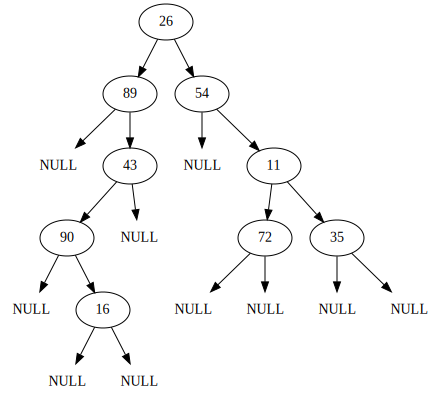

In [83]:
display(hasil_pre_in.get_digraph_simple())

### `LinkedBintree` dari *postorder* dan *inorder*

Algoritma ini hampir sama dengan algoritma membentuk *binary tree* dari *preorder* dan *inorder*. Bedanya, di algoritma ini, dicari elemen *inorder* yang paling ***kanan*** di *postorder*, daripada yang paling kiri di *preorder*.

In [84]:
def linkedbintree_from_postorder_inorder(
        postorder, inorder, is_starting_node=True
    ):

    # Nanti di paling bawah tree kalau inorder sudah kosong,
    # tidak perlu buat node lagi; langsung return None (NULL)
    if len(inorder) == 0:
        return None

    # 1. Di antara semua elemen inorder, mana yang paling KANAN di postorder?
    # Simpan index inorder nya
    selesai = False
    postorder_idx = len(postorder)-1 # mulai dari paling kanan, daripada dari 0
    while (postorder_idx >= 0) and (not selesai):
        # lihat tiap elemen preorder DARI KANAN KE KIRI,
        elemen_postorder = postorder[postorder_idx]
        # dan untuk tiap elemen postorder, periksa satu-satu apakah sama dengan
        # salah satu elemen inorder
        inorder_idx = 0
        while (inorder_idx < len(inorder)) and (not selesai):
            if inorder[inorder_idx] == elemen_postorder:
                selesai = True
            else:
                inorder_idx += 1
        postorder_idx -= 1

    # 2. Buatlah node dengan data di index tersebut di inorder.
    # Kalau belum ada root (karena LinkedBintree belum dibentuk sama sekali),
    # buatlah objek LinkedBintree dengan rootnya adalah node tersebut
    current_root = BintreeNode(inorder[inorder_idx])
    if is_starting_node:
        result = LinkedBintree()
        result.root = current_root

    # 3. Pisah inorder menjadi dua bagian,
    # yaitu sebelah kiri dari elemen inorder_idx dan sebelah kanan darinya
    inorder_left = inorder[:inorder_idx]
    inorder_right = inorder[(inorder_idx+1):]

    current_root.left = linkedbintree_from_postorder_inorder(
        postorder, inorder_left, is_starting_node=False
    )
    current_root.right = linkedbintree_from_postorder_inorder(
        postorder, inorder_right, is_starting_node=False
    )

    if is_starting_node:
        return result
    else:
        return current_root

In [85]:
hasil_post_in = linkedbintree_from_postorder_inorder(
    postorder=[16, 90, 43, 89, 72, 35, 11, 54, 26],
    inorder=[89, 90, 16, 43, 26, 54, 72, 11, 35]
)

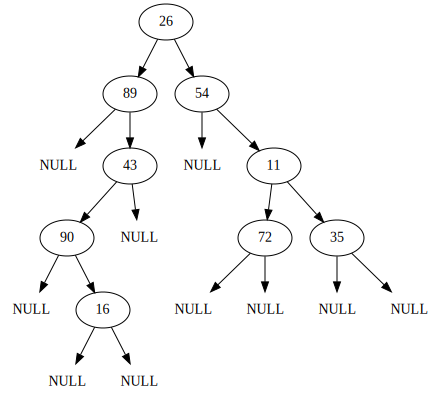

In [86]:
display(hasil_post_in.get_digraph_simple())

### (TODO) `LinkedBintree` dari *preorder* dan *postorder* (cara biasa)

In [87]:
def linkedbintree_from_preorder_postorder(
        preorder, postorder, is_starting_node=True
):

    if (not is_starting_node):
        if len(preorder) == 0 or len(postorder) == 0:
            return None
        if len(preorder) == 1:
            return BintreeNode(preorder[0])
        if len(postorder) == 1:
            return BintreeNode(postorder[0])

    # 1. Buatlah node baru dengan datanya adalah preorder[0]
    # (atau sama saja elemen terakhir dari postorder).
    # Kalau belum ada root (karena LinkedBintree belum dibentuk sama sekali),
    # buatlah objek LinkedBintree dengan rootnya adalah node tersebut
    current_root = BintreeNode(preorder[0])
    if is_starting_node:
        result = LinkedBintree()
        result.root = current_root

    # 2. Tentukan list postorder untuk left subtree dan untuk right subtree:
    # 2a. Carilah letak preorder[1] di postorder, misal postorder_idx
    # 2b. Belah postorder menjadi dua, dengan postorder_idx masuk ke kiri,
    #     dan elemen terakhir postorder tidak masuk keduanya

    postorder_idx = 0
    while (postorder_idx < len(postorder) and
           postorder[postorder_idx] != preorder[1]):
        postorder_idx += 1

    # 0 <= indeks < (postorder_idx+1)
    postorder_left = postorder[ 0 : (postorder_idx+1) ]

    # (postorder_idx+1) <= indeks < elemen terakhir (indeks -1)
    postorder_right = postorder[ (postorder_idx+1) : -1 ]

    # 3. Tentukan list preorder untuk left subtree dan untuk right subtree:
    # 3a. Carilah letak postorder[-2] di preorder, misal preorder_idx
    # 3b. Belah preorder menjadi dua, dengan preorder_idx masuk ke kanan,
    #     dan elemen pertama preorder tidak masuk keduanya

    preorder_idx = 0
    while (preorder_idx < len(preorder) and
           preorder[preorder_idx] != postorder[-2]):
        preorder_idx += 1

    # 1 <= indeks < preorder_idx
    preorder_left = preorder[ 1 : preorder_idx ]

    # preorder_idx <= indeks
    preorder_right = preorder[ preorder_idx : ]

    print("preorder_left", len(preorder_left))
    print("preorder_right", len(preorder_right))
    print("postorder_left", len(postorder_left))
    print("postorder_right", len(postorder_right))

    # 4. Langkah rekursif: melakukan langkah yang sama di left subtree dan
    # right subtree, hasilnya disambung ke current_root

    current_root.left = linkedbintree_from_preorder_postorder(
        preorder=preorder_left, postorder=postorder_left,
        is_starting_node=False
    )
    current_root.right = linkedbintree_from_preorder_postorder(
        preorder=preorder_right, postorder=postorder_right,
        is_starting_node=False
    )

    if is_starting_node:
        return result
    else:
        return current_root

In [88]:
test_pre_post = linkedbintree_from_preorder_postorder(
    preorder=["F", "B", "A", "D", "C", "E", "G", "I", "H"],
    postorder=["A", "C", "E", "D", "B", "H", "I", "G", "F"]
)

preorder_left 5
preorder_right 3
postorder_left 5
postorder_right 3
preorder_left 1
preorder_right 3
postorder_left 1
postorder_right 3
preorder_left 1
preorder_right 1
postorder_left 1
postorder_right 1
preorder_left 0
preorder_right 2
postorder_left 2
postorder_right 0


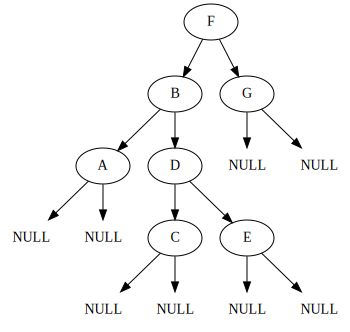

In [89]:
display(test_pre_post.get_digraph_simple())

### (TODO) `LinkedBintree` dari *preorder* dan *postorder* (cara dijamin *complete*)

## (TODO) (Pengayaan) `LinkedBST` dari *preorder* atau *postorder*

### (TODO) `LinkedBST` dari *preorder*

### (TODO) `LinkedBST` dari *postorder*

## (TODO) (Pengayaan) *$m$-ary tree*